In [127]:
import numpy as np
import pandas as pd

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
data = pd.read_csv('cars.csv')
data.head(10)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front-wheel Drive,Gasoline,39-38,Black,Parchment,0.0,0.0,0.0,Iconic Coach,NaN,4.4,12.0,300.0,13988.0
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Gray,Ebony,1.0,1.0,1.0,Kars Today,NaN,4.4,12.0,NaN,17995.0
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Bellanova White Pearl,Ebony,0.0,1.0,1.0,Weiss Toyota of South County,4.3,4.4,12.0,500.0,17000.0
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,NaN,0.0,1.0,1.0,Apple Tree Acura,NaN,4.4,12.0,675.0,14958.0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,NaN,Ebony,1.0,0.0,1.0,Herb Connolly Chevrolet,3.7,4.4,12.0,300.0,14498.0
5,Acura,ILX Hybrid 1.5L,2013,62042.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Polished Metal Metallic,Ebony,0.0,0.0,1.0,Kalidy Kia,2.2,4.4,12.0,109.0,18000.0
6,Acura,ILX Hybrid 1.5L,2013,57212.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Silver,Ebony,0.0,1.0,1.0,Ohio Car Mart,NaN,4.4,12.0,NaN,15999.0
7,Acura,ILX Hybrid 1.5L,2014,214000.0,111.0HP 1.5L 4 Cylinder Engine Gasoline/Mild E...,A/T,Front-wheel Drive,Hybrid,NaN,White,Black,NaN,NaN,NaN,NaN,NaN,3.7,7.0,NaN,8500.0
8,Acura,ILX Hybrid 1.5L,2013,61539.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front-wheel Drive,Hybrid,39-38,Silver,NaN,1.0,1.0,1.0,Napleton's Palatine Subaru,4.6,4.4,12.0,NaN,16950.0
9,Acura,NSX,1993,62018.0,3.0L V6 24V SPFI DOHC,5-Speed Manual,NaN,Gasoline,19-24,Formula Red,Black,0.0,0.0,0.0,Midwest Car Connect,NaN,5.0,1.0,NaN,84995.0


In [129]:
data.shape

(762091, 20)

In [130]:
# clean dataset, but we need to do data transformation
data.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
driver_rating          float64
driver_reviews_num     float64
price_drop             float64
price                  float64
dtype: object

## Data Cleaning

cleaned columns: 
- price
- mileage
- exterior_color
- interior_color
- transmission
- fuel_type
- year 
- mgp
- drivetrain

- created another column 'tank size'


In [131]:
data['price'].sort_values(ascending=False)

188113    1.000000e+09
108142    1.000000e+09
188260    1.000000e+09
224571    8.888889e+06
84358     4.999999e+06
              ...     
584638    2.590000e+02
5658      1.000000e+00
13850     1.000000e+00
735177    1.000000e+00
660696    1.000000e+00
Name: price, Length: 762091, dtype: float64

In [132]:
# clean outlier prices
data = data[(data["price"]<data["price"].max()) & (data["price"] > 1.0)]

In [133]:
# remove seller_name
# We believe that the seller name has no effect on the price of the vehicle
data = data.drop(columns=['seller_name'], axis = 1)

In [134]:
# there are many outlier rows.
# 1119067 miles can drive around the earth 46627 times!
data['mileage'].sort_values(ascending=False)[:20]

756847    1119067.0
76422      999999.0
511961     999999.0
494409     999999.0
617503     974302.0
319941     938032.0
522994     915383.0
136180     777698.0
669643     769938.0
229883     763474.0
302334     754680.0
157346     724500.0
481170     680094.0
4896       668131.0
169278     662110.0
121155     653132.0
456962     644736.0
298512     638693.0
220225     620637.0
531797     566517.0
Name: mileage, dtype: float64

In [135]:
# delete the outliers (according to the Interquantile Range Outlier Detection method, outliers lie at >= 98% percentile)
percentile_98 = data['mileage'].quantile(0.98)
data = data[data['mileage'] <= percentile_98]

In [136]:
# clean extrior color

# categorize common color types
data['exterior_color_cleaned'] = data['exterior_color']
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*black.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*blk.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*bl.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*ebony.*', 'black', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*charcoal.*', 'black', case=False, regex=True)

# colors of gray
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*gray.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*steel.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*grey.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*metal.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*metallic.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*silver.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*graphite.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*platinum.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*grye.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*silvr.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*gry.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Titanium.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*SILV.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*sil.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*slate.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*lunar.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Magnesium.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Granite.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*SIVER.*', 'gray', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*SLIVER.*', 'gray', case=False, regex=True)

# colors of white
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*white.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*whiite.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*wt.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*whi.*', 'white', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Wh.*', 'white', case=False, regex=True)

# colors of red
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*red.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*cherry.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*burgundy.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*maroon.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*garnet.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*amber.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Pomegranate.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*BURGUN.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*MAROOON.*', 'red', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*BURGAN.*', 'red', case=False, regex=True)


#colors of blue
# data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*pearl.*', 'pearl', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*blue.*', 'blue', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*night.*', 'blue', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*blu.*', 'blue', case=False, regex=True)

# colors of green
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*green.*', 'green', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*teal.*', 'green', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Turquoise.*', 'green', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*olive.*', 'green', case=False, regex=True)


# colors of yellow 
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*yellow.*', 'yellow', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*YELLLO.*', 'yellow', case=False, regex=True)

data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*orange.*', 'orange', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Citrus.*', 'orange', case=False, regex=True)

data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*beige.*', 'beige', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*brown.*', 'brown', case=False, regex=True)

# colors of gold
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*gold.*', 'gold', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*copper.*', 'gold', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*champagne.*', 'gold', case=False, regex=True)

# colors of purple
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*purple.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*violet.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*plum.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*berry.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Grape.*', 'purple', case=False, regex=True)
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*Velvet.*', 'purple', case=False, regex=True)

data['exterior_color_cleaned'] = data['exterior_color_cleaned'].str.replace('.*pink.*', 'pink', case=False, regex=True)

colors_keep_exterior = ['black', 'gray', 'white', 'red', 'blue', 'green', 'yellow', 'orange', 'beige', 'brown', 'gold', 'purple', 'pink']
data['exterior_color_cleaned'] = data['exterior_color_cleaned'].where(data['exterior_color'].isin(colors_keep_exterior), 'other')


In [137]:
# convert transmission into automatic or manual types  transmission (automatic, manual, other is either na value or invalid input)

automatic_kw = "Automatic|A/T|Dual Shift Mode|dual clutch|auto|TipTronic|cvt|Power Glide|ivt|dct|evt|continuously variable"
manual_kw = "Manual|M/T|richmond 5 Speed|PDK"
data["transmission_cleaned"] = 0
data["transmission"].fillna("na", inplace = True)
data.loc[data["transmission"].str.contains(automatic_kw,case=False),"transmission_cleaned"] = "Automatic"
data.loc[data["transmission"].str.contains(manual_kw ,case=False),"transmission_cleaned"] = "Manual"
data.loc[data["transmission_cleaned"] == 0,"transmission_cleaned"] = "Other"

In [138]:
# clean interior color

# colors of black
data['interior_color_cleaned']= data['interior_color'] 
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*black.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*ebony.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Charcoal.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*BLK.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*onyx.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*balck.*', 'black', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Smoke.*', 'black', case=False, regex=True)

# colors of red
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*red.*', 'red', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Burgundy.*', 'red', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Maroon.*', 'red', case=False, regex=True)

# colors of gray
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*gray.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*grey.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*silver.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*graphite.*', 'gray', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Platinum.*', 'gray', case=False, regex=True)

# colors of white
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*ivory.*', 'white', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*white.*', 'white', case=False, regex=True)

# colors of beige
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*beige.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*biege.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Cream.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Camel.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*tan.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Quartz.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Mocha.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*stone.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*neutral.*', 'beige', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*sand.*', 'beige', case=False, regex=True)

# colors of blue
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*blue.*', 'blue', case=False, regex=True)

# colors of purple
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*purple.*', 'purple', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Orchid.*', 'purple', case=False, regex=True)

# colors of brown
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*brown.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Taupe.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Caramel.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*walnut.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Nougat.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Peanut Butter.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Espresso.*', 'brown', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*saddle.*', 'brown', case=False, regex=True)

# colors of orange
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*orange.*', 'orange', case=False, regex=True)

# colors of gold
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Champagne.*', 'gold', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*gold.*', 'gold', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*Bronze.*', 'gold', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*copper.*', 'gold', case=False, regex=True)

# colors of green
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*green.*', 'green', case=False, regex=True)
data['interior_color_cleaned']= data['interior_color_cleaned'].str.replace('.*teal.*', 'green', case=False, regex=True)

colors_keep_exterior = ['black', 'gray', 'white', 'red', 'beige', 'blue', 'purple', 'brown', 'orange', 'gold', 'green']
data['interior_color_cleaned']= data['interior_color_cleaned'].where(data['exterior_color'].isin(colors_keep_exterior), 'other')

In [139]:
# get tank_size '..L' from engine
data["tank_size"] = data["engine"].str.extract(r'(\d+(\.\d+)?L)')[0]
data["tank_size"].fillna("naL",inplace = True)
data["tank_size"] = data["tank_size"].apply(lambda x: x.split("L")[0])
data["tank_size"] = data["tank_size"].apply(lambda x: float(x) if x != "na" else x)
data["tank_size"] = data[["tank_size"]].replace('na', np.nan)['tank_size']

In [140]:
# clean mpg data (list) to integer by extracting the minimum and maximum mpg, then finding the mean to fill the column
mgp_only = data[["mpg"]]
mgp_only.loc[mgp_only["mpg"].isna(), "mpg"] = "0-0"
mgp_only = mgp_only["mpg"].str.split("-").apply(lambda x: [float(i) for i in x]).apply(lambda x: sum(x)/2)
data["mpg"] = mgp_only
data['mpg'].replace(0, np.nan,inplace = True)

/var/folders/7x/2x0pb8vn45qdy4wd572r2ngr0000gn/T/ipykernel_75898/1543450566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgp_only.loc[mgp_only["mpg"].isna(), "mpg"] = "0-0"


For column: 'year':

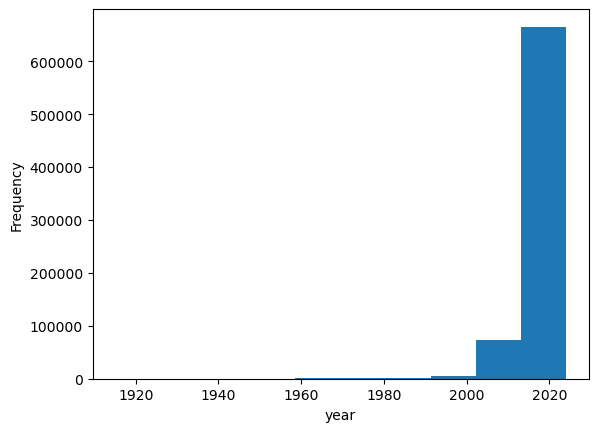

In [141]:
plt.hist(data['year'])
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show() 

In [142]:
# only keep the rows that have cars produced in or after 2000
(data['year'] >= 2000).sum()

741009

In [143]:
rows_to_keep = data['year'][data['year'] >= 2000].index
data = data.loc[rows_to_keep]

Data Cleaning on fuel_type
- Flexible fuel vehicles (FFVs) have an internal combustion engine and are capable of operating on gasoline and any blend of gasoline and ethanol up to 83%
- E85 (or flex fuel) is a gasoline-ethanol blend containing 51% to 83% ethanol, depending on geography and season.

In [144]:
data['fuel_type'].isna().sum()

20836

In [145]:
data['fuel_type'].unique()

array(['Gasoline', 'Hybrid', nan, 'Premium', 'Electric',
       'Gasoline/Mild Electric Hybrid', 'Diesel', 'E85 Flex Fuel',
       'Flexible Fuel', 'Gasoline Fuel', 'Plug-In Hybrid',
       'Premium (Required)', 'Regular Unleaded', 'Compressed Natural Gas',
       'Other', 'Natural Gas', 'Flex Fuel Capability', 'Premium Unleaded',
       'Unspecified', 'Biodiesel', 'Bio Diesel', 'Diesel Fuel', 'Gaseous',
       'Hydrogen Fuel Cell', 'Gas', 'PHEV', 'Hybrid Fuel', 'Automatic',
       'Electric Fuel System', 'G', 'B', 'Gas/Electric Hybrid',
       'Flex Fuel', 'Plug-In Electric/Gas'], dtype=object)

In [146]:
"""categorize the fuel types into 'gasoline', 'hybrid', and 'electric' """
def categorize_fuel_type(fuel_type):
    if pd.isna(fuel_type) or fuel_type == 'unspecified':
        return None  # Keep NaN values as they are
    fuel_type = fuel_type.lower()
    if 'electric' in fuel_type and 'hybrid' not in fuel_type:
        return 'Electric'
    elif 'hybrid' in fuel_type or 'phev' in fuel_type or 'plug-in' in fuel_type:
        return 'Hybrid'
    # assume 'regular' means gasoline
    elif 'gasoline' in fuel_type or 'gas' in fuel_type or 'e85' in fuel_type or 'flex' in fuel_type or 'regular' in fuel_type:
        return 'Gasoline'
    elif 'bio diesel' in fuel_type or 'biodiesel' in fuel_type:
        return 'Biodiesel'
    elif 'diesel' in fuel_type:
        return 'Diesel'
    elif 'premium' in fuel_type: # could be premium 'gasoline' but we are distinguishing it since it can be different from regular gasoline
        return 'Premium'
    else: 
        return 'other' #return other types of fuel as 'other'

# Apply the function to the 'fuel_type' column
data['fuel_type'] = data['fuel_type'].apply(categorize_fuel_type)

In [147]:
data['fuel_type'].unique()

array(['Gasoline', 'Hybrid', None, 'Premium', 'Electric', 'Diesel',
       'other', 'Biodiesel'], dtype=object)

In [148]:
data['fuel_type'].isna().sum()

20836

For 'drivetrain':

In [149]:
data['drivetrain'].unique()

array(['Front-wheel Drive', 'All-wheel Drive', 'Rear-wheel Drive', nan,
       'FWD', 'AWD', 'Four-wheel Drive', 'Unknown', 'RWD',
       'All-Wheel Drive', 'Front-Wheel Drive', 'Front Wheel Drive',
       'Four-Wheel Drive', '4WD', 'Rear-Wheel Drive', 'All Wheel Drive',
       'Rear Wheel Drive', 'Four Wheel Drive',
       'All-Wheel Drive with Locking and Limited-Slip Differential',
       'Front-Wheel Drive with Limited-Slip Differential',
       'Rear-Wheel Drive with Limited-Slip Differential',
       'Four-Wheel Drive with Locking and Limited-Slip Differential',
       'All-Wheel Drive with Locking Differential', '4x4',
       'Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT',
       'Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT',
       'Engine: 2.4L DOHC I4 GDI', 'Engine: 1.6L DOHC I4 GDI Turbo',
       'Engine: 1.6L 4-Cyl. 16-Valve MPI',
       'Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT',
       'Four-Wheel Drive with Locking Differential', '4x2'], dtype=object)

#### Matching some unique drivetrains to specific car manufacturer and model (manually looked up from Google):
'Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT': 2020 Kia Telluride models with standard **Front-wheel drive** function

'Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT': 2020 & 2021 Kia Sportage LX --> **front-wheel-drive**

'Engine: 2.4L DOHC I4 GDI': 2020 Kia Optima LX --> **front-wheel-drive**

'Engine: 1.6L DOHC I4 GDI Turbo': 2020 Kia Optima EX Premium 4dr --> **front-wheel-drive**

'Engine: 1.6L 4-Cyl. 16-Valve MPI': 2022 Kia Rio S --> **front-wheel-drive**

'Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT': 2021 Kia Forte LXS --> **front-wheel-drive**

In [150]:
# for the 1st specific engine:
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
418334,Kia,Telluride LX,2020,79989.0,NaN,Automatic,Engine: Lambda II 3.8L GDI DOHC V6 w/Dual CVVT,None,NaN,Snow White Pearl - SWP,...,0.0,4.9,4.8,214.0,NaN,27999.0,other,Automatic,other,NaN


In [151]:
# for the 2nd specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
419745,Kia,Sportage LX,2020,59269.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Sparkling Silver,...,0.0,4.9,4.8,179.0,NaN,19972.0,other,Automatic,other,NaN
420468,Kia,Sportage LX,2021,51289.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Burnished Copper,...,1.0,4.9,4.8,60.0,NaN,19972.0,other,Automatic,other,NaN
422105,Kia,Sportage LX,2020,59269.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Sparkling Silver,...,0.0,4.9,4.8,179.0,NaN,19972.0,other,Automatic,other,NaN
423156,Kia,Sportage LX,2020,34871.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Clear White - UD,...,1.0,4.9,4.8,179.0,NaN,23999.0,other,Automatic,other,NaN
423365,Kia,Sportage LX,2020,20829.0,NaN,Automatic,Engine: 2.4L GDI DOHC 16V I4 -inc: dual CVVT,None,NaN,Hyper Red,...,1.0,4.9,4.8,179.0,NaN,19972.0,other,Automatic,other,NaN


In [152]:
# for the 3rd specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 2.4L DOHC I4 GDI'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
429718,Kia,Optima LX,2020,35621.0,NaN,Automatic,Engine: 2.4L DOHC I4 GDI,None,NaN,Sparkling Silver - KCS,...,1.0,4.9,4.8,69.0,NaN,19468.0,other,Automatic,other,NaN


In [153]:
# for the 4th specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 1.6L DOHC I4 GDI Turbo'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
431133,Kia,Optima EX Premium,2020,37752.0,NaN,AUTOMATIC,Engine: 1.6L DOHC I4 GDI Turbo,None,NaN,Snow White Pearl - SWP,...,1.0,4.9,4.8,69.0,NaN,22999.0,other,Automatic,other,NaN


In [154]:
# for the 5th specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 1.6L 4-Cyl. 16-Valve MPI'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
444217,Kia,Rio S,2022,5062.0,NaN,A,Engine: 1.6L 4-Cyl. 16-Valve MPI,Gasoline,NaN,Steel Gray - KLG,...,1.0,NaN,4.5,5.0,NaN,22995.0,other,Other,other,NaN


In [155]:
# for the 6th specific engine
data.loc[data['drivetrain'][data['drivetrain'] == 'Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT'].index]

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
450192,Kia,Forte LXS,2021,10061.0,NaN,A,Engine: 2.0L 4-Cylinder MPI 16V DOHC w/Dual CVVT,None,NaN,Clear White - UD,...,1.0,NaN,4.8,51.0,NaN,22995.0,other,Other,other,NaN


In [156]:
# Define a function to map the various drivetrain entries to main types or 'Other'
def clean_drivetrain(drive):
    drive = str(drive).lower()  # Convert to lower case for uniformity
    if 'front wheel' in drive or 'fwd' in drive or 'front-wheel' in drive:
        return 'Front Wheel Drive'
    elif 'all wheel' in drive or 'awd' in drive or '4wd' in drive or '4x4' in drive or 'all-wheel' in drive or '4X4' in drive:
        return 'All Wheel Drive'
    elif 'rear wheel' in drive or 'rwd' in drive or 'rear-wheel' in drive or '4x2' in drive:
        return 'Rear Wheel Drive'
    elif 'four wheel' in drive or 'four-wheel' in drive or '2wd' in drive:
        return 'Four Wheel Drive'
    elif 'engine' in drive:
        return 'Front Wheel Drive'
    else:
        return 'Other' #keep all other possible drive types as other

# Apply the function to the 'drivetrain' column
data['drivetrain'] =  data['drivetrain'].apply(clean_drivetrain)

# Let's check the unique values again to ensure our transformation is correct
data['drivetrain'].unique()

array(['Front Wheel Drive', 'All Wheel Drive', 'Rear Wheel Drive',
       'Other', 'Four Wheel Drive'], dtype=object)

## EDA

EDA (stats, properties, interesting findings around some problems): should motivate model design

Stats:

In [157]:
data.describe()

,year,mileage,mpg,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,tank_size
count,741009.000000,741009.000000,599687.000000,718145.000000,713037.000000,718052.000000,537176.000000,711283.000000,741009.000000,402060.000000,7.410090e+05,689855.000000
mean,2018.227371,52687.241824,24.928266,0.225853,0.570827,0.655856,4.167385,4.626761,90.413450,1000.103017,3.288342e+04,3.079996
std,3.618434,37770.928789,5.960139,0.418143,0.494958,0.475089,0.798332,0.276194,115.886681,1316.133156,2.358005e+04,1.354788
min,2000.000000,0.000000,4.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,2.590000e+02,0.000000
25%,2017.000000,22901.000000,21.000000,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,377.000000,1.999400e+04,2.000000
50%,2019.000000,44520.000000,24.000000,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,636.000000,2.802600e+04,2.500000
75%,2021.000000,75536.000000,28.000000,0.000000,1.000000,1.000000,4.700000,4.800000,120.000000,1006.000000,3.979900e+04,3.600000
max,2024.000000,170188.000000,127.500000,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,100000.000000,3.490000e+06,39.500000


In [158]:
data.nunique()

manufacturer                  30
model                      10774
year                          25
mileage                   145661
engine                      5431
transmission                 935
drivetrain                     5
fuel_type                      7
mpg                          152
exterior_color              6991
interior_color              4431
accidents_or_damage            2
one_owner                      2
personal_use_only              2
seller_rating                 41
driver_rating                 31
driver_reviews_num           369
price_drop                  6386
price                      62719
exterior_color_cleaned        11
transmission_cleaned           3
interior_color_cleaned        13
tank_size                     68
dtype: int64

In [159]:
data.head(2)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front Wheel Drive,Gasoline,38.5,Black,...,0.0,NaN,4.4,12.0,300.0,13988.0,other,Automatic,other,1.5
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front Wheel Drive,Hybrid,38.5,Gray,...,1.0,NaN,4.4,12.0,NaN,17995.0,other,Automatic,other,1.5


In [160]:
data.dtypes

manufacturer               object
model                      object
year                        int64
mileage                   float64
engine                     object
transmission               object
drivetrain                 object
fuel_type                  object
mpg                       float64
exterior_color             object
interior_color             object
accidents_or_damage       float64
one_owner                 float64
personal_use_only         float64
seller_rating             float64
driver_rating             float64
driver_reviews_num        float64
price_drop                float64
price                     float64
exterior_color_cleaned     object
transmission_cleaned       object
interior_color_cleaned     object
tank_size                 float64
dtype: object

#### Univariate analysis

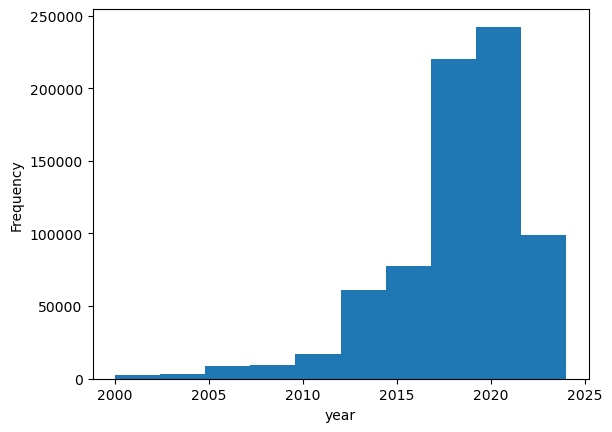

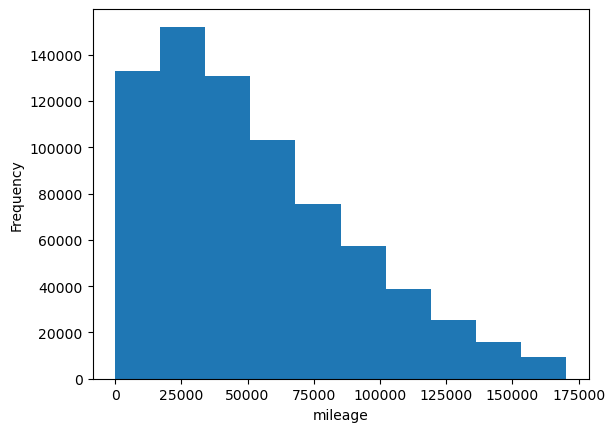

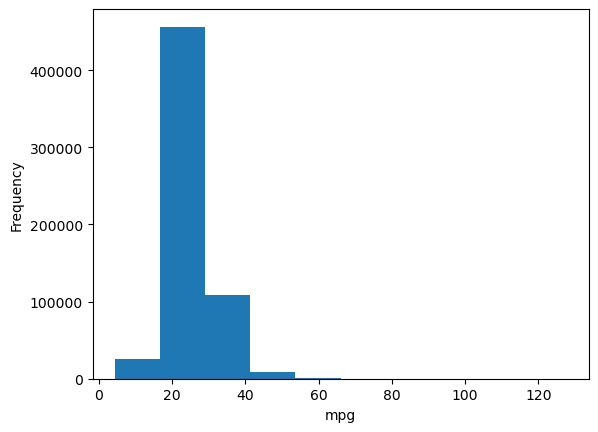

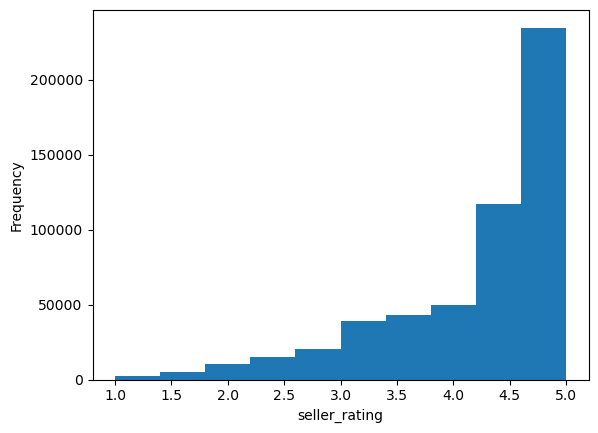

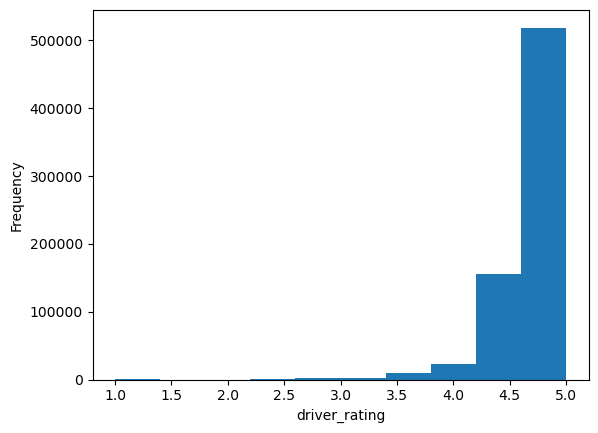

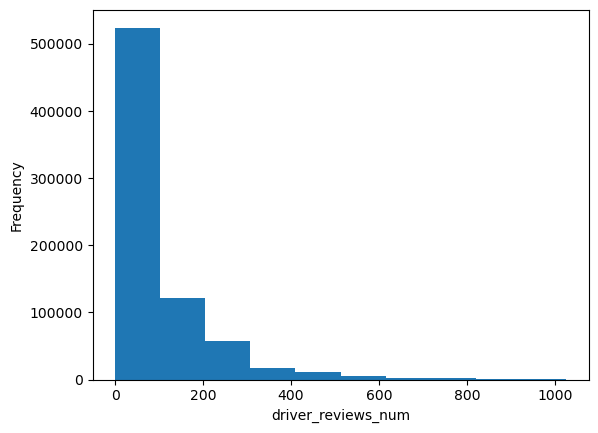

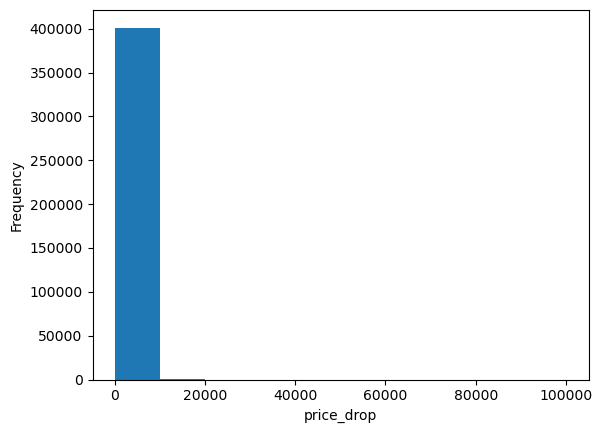

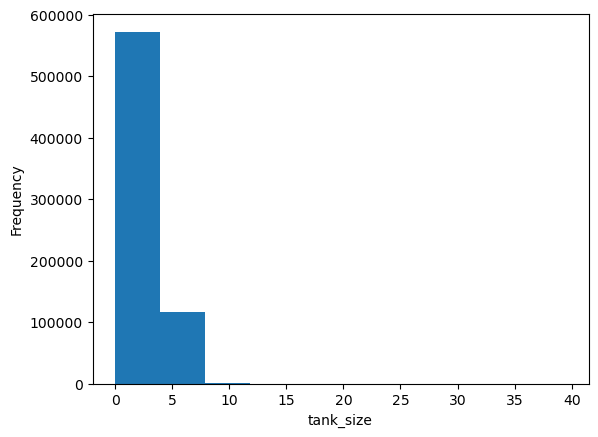

In [161]:
numeric_cols = ['year', 'mileage', 'mpg', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'tank_size']
for col in numeric_cols:
    plt.hist(data[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show() 

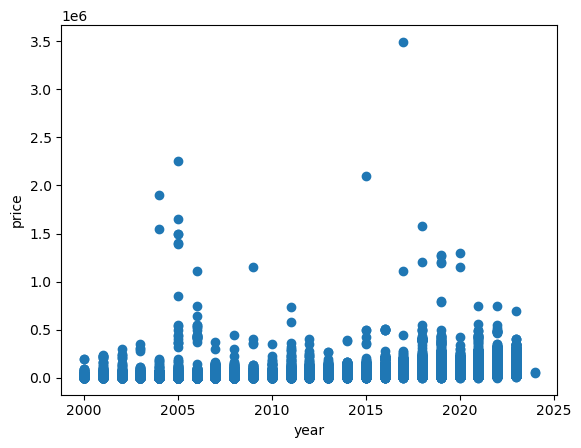

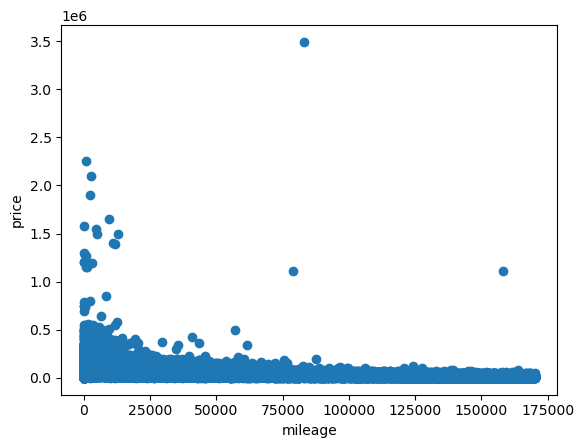

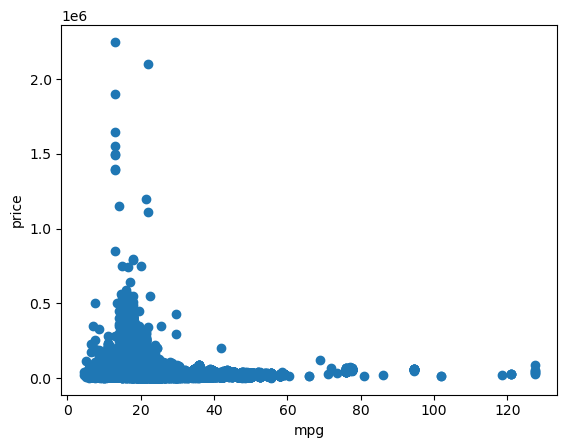

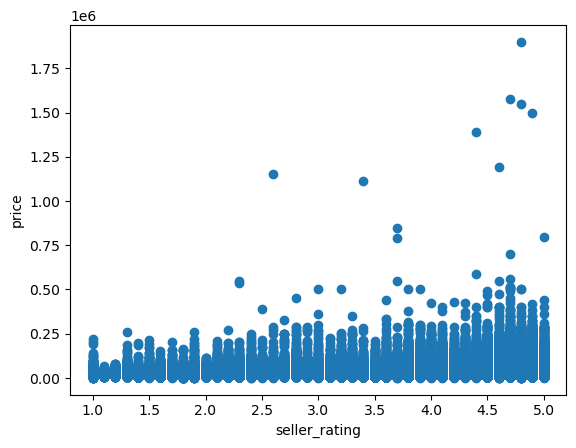

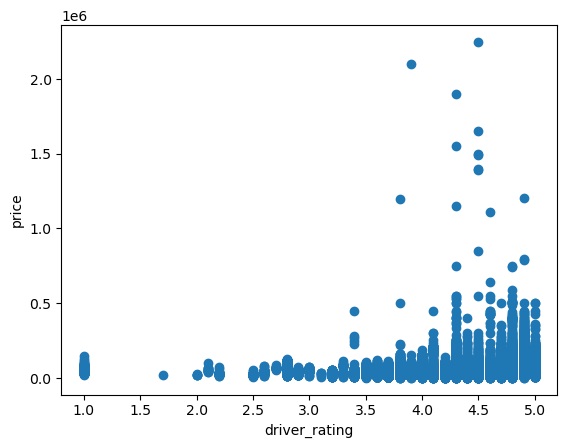

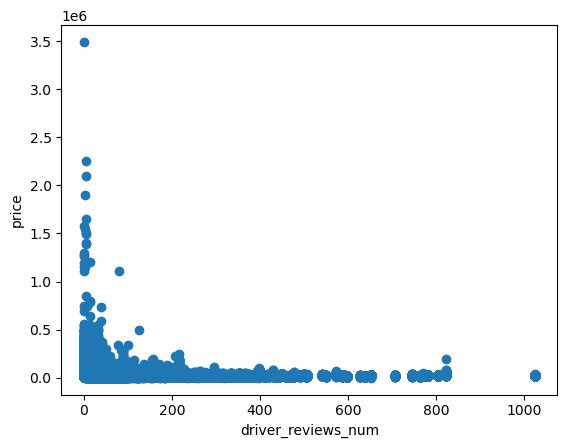

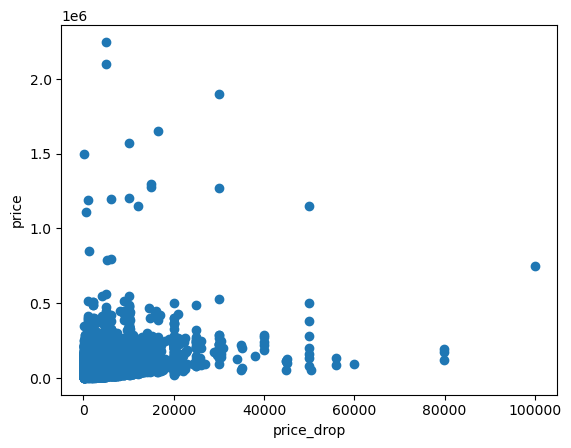

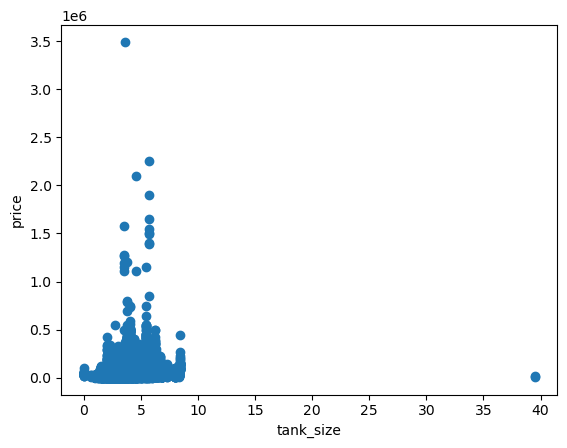

In [162]:
numeric_cols = ['year', 'mileage', 'mpg', 'seller_rating', 'driver_rating', 'driver_reviews_num', 'price_drop', 'tank_size']
for col in numeric_cols:
    plt.scatter(x=data[col], y=data['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show() 

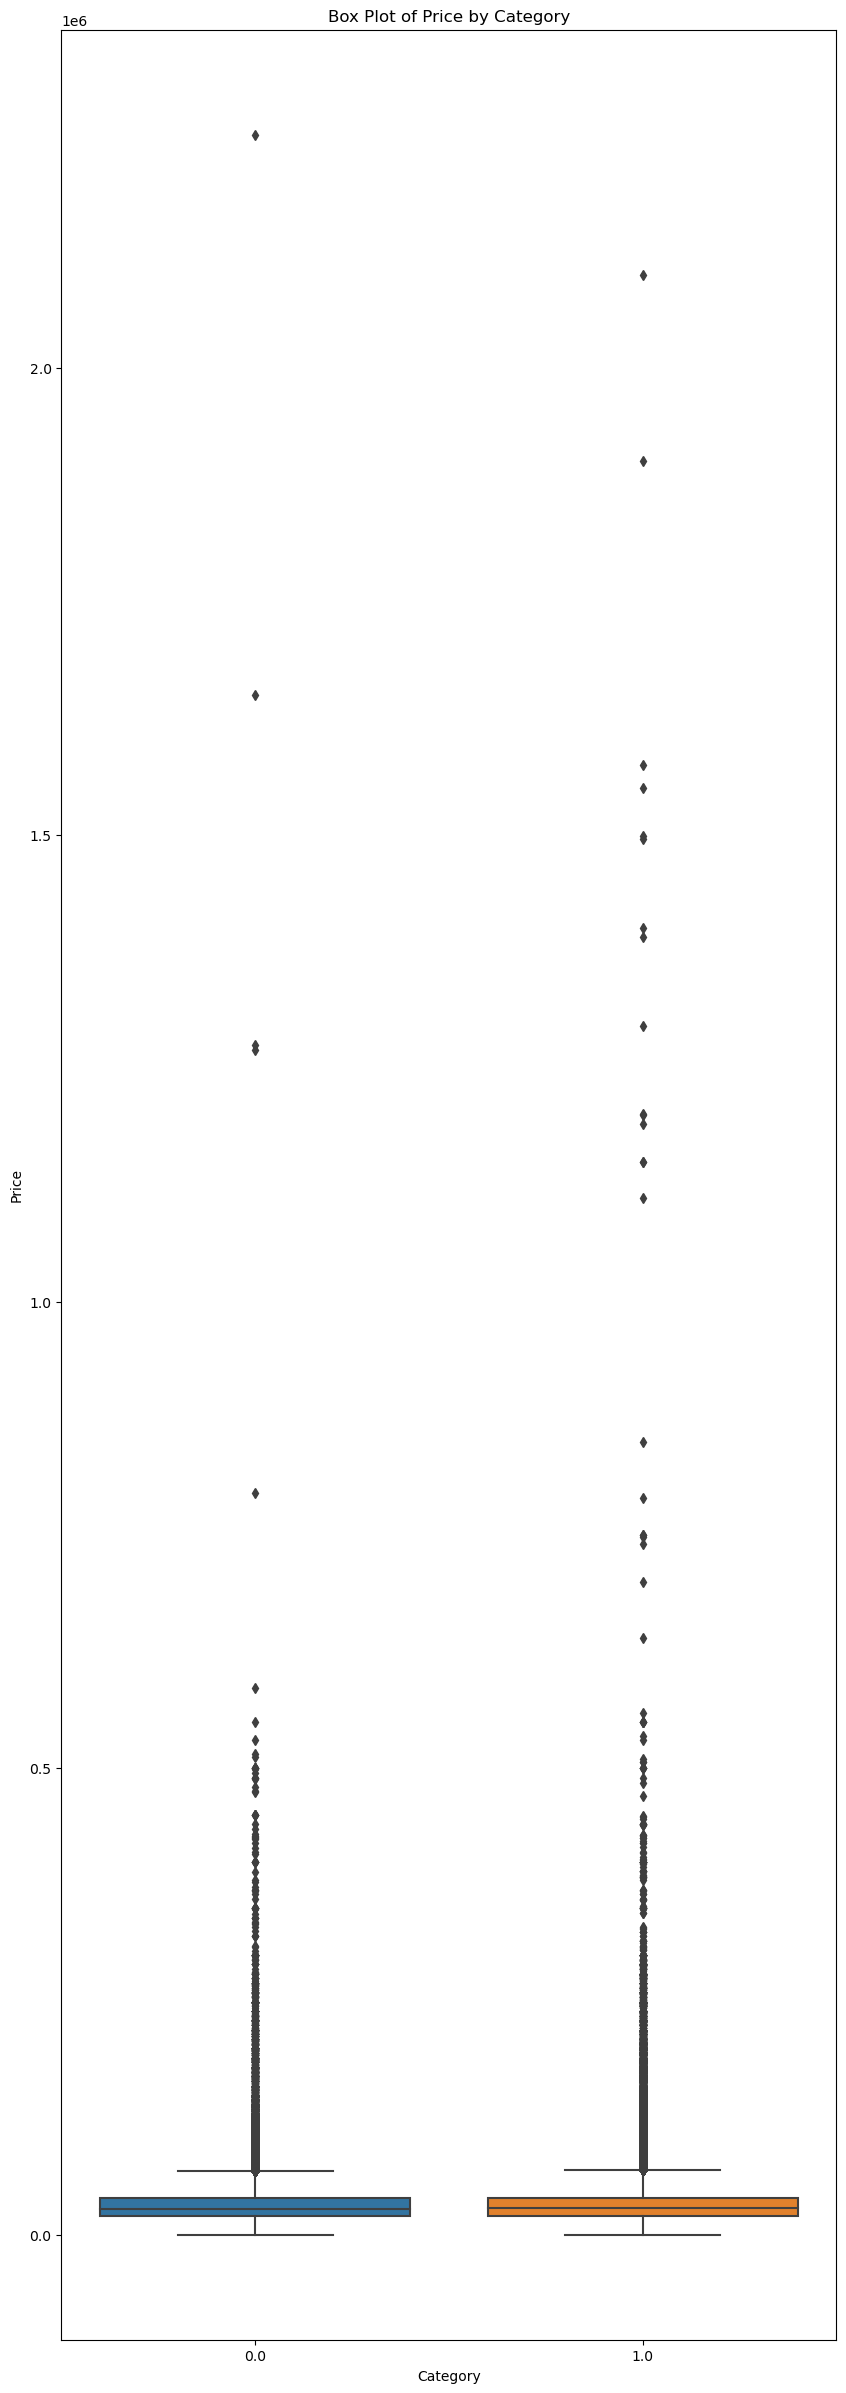

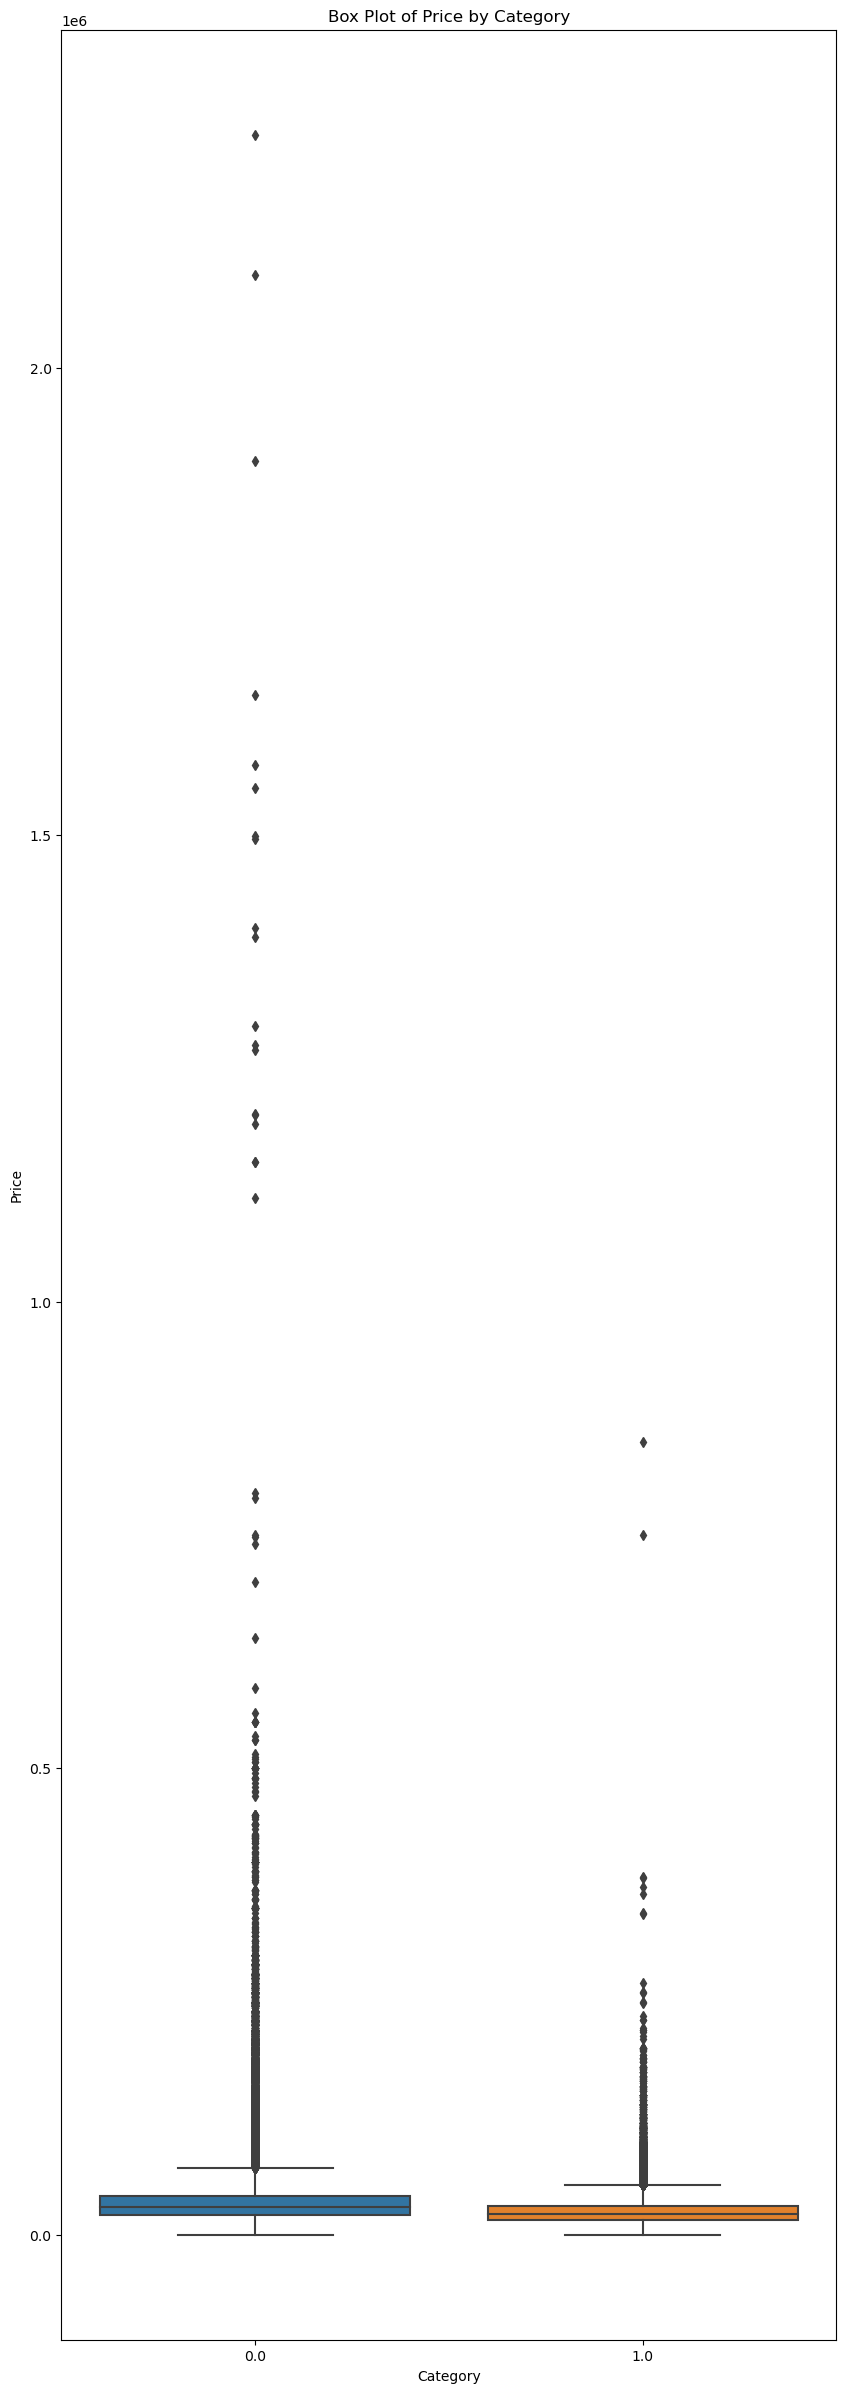

In [163]:
for i in ["personal_use_only","accidents_or_damage"]:
    plt.figure(figsize=(10, 30))
    sns.boxplot(x=i, y='price', data=data)
    plt.xlabel('Category')
    plt.ylabel('Price')
    plt.title('Box Plot of Price by Category')
    plt.show()

#### bivariate analysis

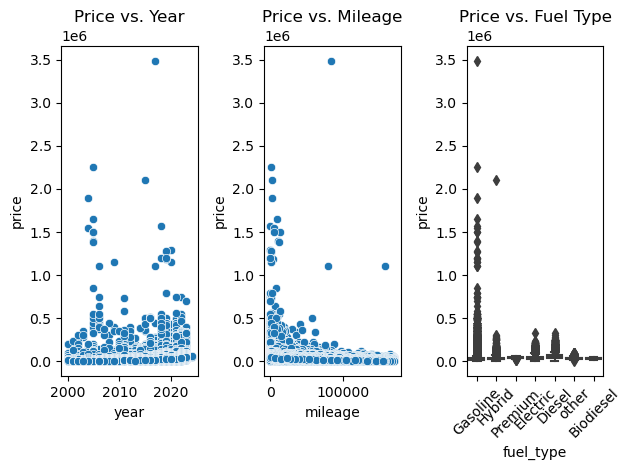

In [164]:
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='year', y='price')
plt.title('Price vs. Year')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='mileage', y='price')
plt.title('Price vs. Mileage')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='fuel_type', y='price')
plt.title('Price vs. Fuel Type')
plt.xticks(rotation=45)

ticks = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['${:,.0f}'.format(x * 1e6) for x in ticks])  # convert prices in millions to in dollar

plt.tight_layout()
plt.show()

/var/folders/7x/2x0pb8vn45qdy4wd572r2ngr0000gn/T/ipykernel_75898/1483219256.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


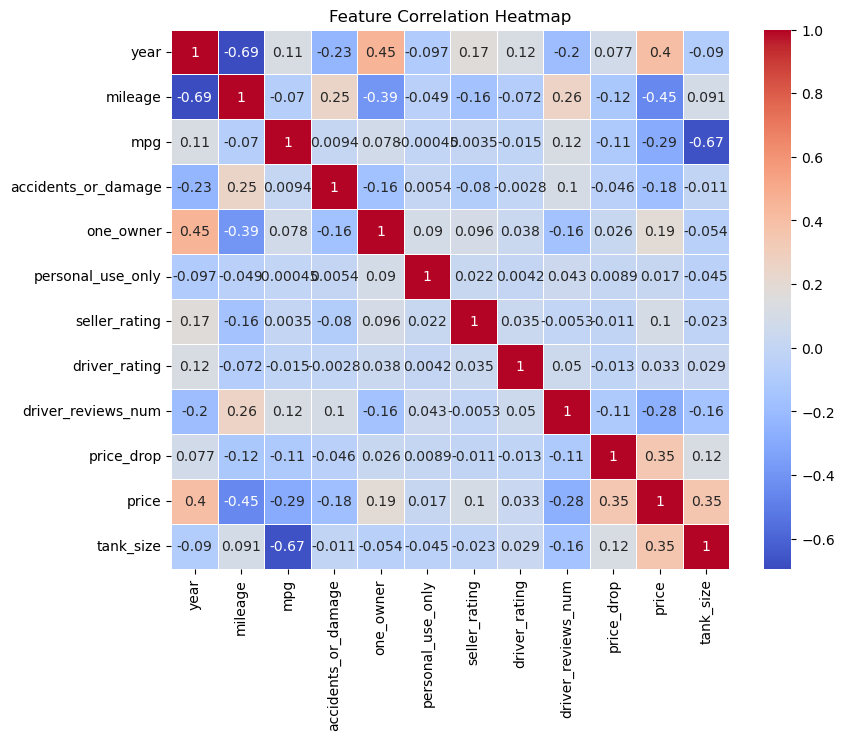

In [165]:
# heatmap: 
plt.figure(figsize=(9, 7))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

## Pre-Processing/Data Transformation

In [166]:
exterior_color = data[["exterior_color"]]
exterior_color.loc[exterior_color["exterior_color"].isna(), "exterior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"
exterior_color = exterior_color["exterior_color"].str.split(" ").apply(lambda x: len(x)).apply(lambda x: 0 if x == 23 else x)
data["exterior_color_length"] = exterior_color
interior_color = data[["interior_color"]]
interior_color.loc[interior_color["interior_color"].isna(), "interior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"
interior_color = interior_color["interior_color"].str.split(" ").apply(lambda x: len(x)).apply(lambda x: 0 if x == 23 else x)
data["interior_color_length"] = interior_color

/var/folders/7x/2x0pb8vn45qdy4wd572r2ngr0000gn/T/ipykernel_75898/3413241794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exterior_color.loc[exterior_color["exterior_color"].isna(), "exterior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"
/var/folders/7x/2x0pb8vn45qdy4wd572r2ngr0000gn/T/ipykernel_75898/3413241794.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interior_color.loc[interior_color["interior_color"].isna(), "interior_color"] = "1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1"


In [167]:
# imputation (by distribution)

In [168]:
# create a column that calculates the time difference between now and 'year': the year when the car was produced
yearn = 2024 - data["year"]
yearn

0         11
1         11
2         11
3         11
4         11
          ..
762086     2
762087    12
762088    10
762089    11
762090     9
Name: year, Length: 741009, dtype: int64

In [169]:
# label encoding on 'manufacturer', 'fuel_type'
data['manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hyundai', 'INFINITI',
       'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'RAM',
       'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [170]:
# split 'engine' into different columns

In [171]:
data['engine']

0         1.5L I-4 i-VTEC variable valve control, engine...
1                               1.5L I4 8V MPFI SOHC Hybrid
2                               1.5L I4 8V MPFI SOHC Hybrid
3                               1.5L I4 8V MPFI SOHC Hybrid
4                               1.5L I4 8V MPFI SOHC Hybrid
                                ...                        
762086                           2.0L I4 16V GDI DOHC Turbo
762087         250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel
762088                          2.5L I5 20V MPFI DOHC Turbo
762089                          2.5L I5 20V MPFI DOHC Turbo
762090                          2.5L I5 20V MPFI DOHC Turbo
Name: engine, Length: 741009, dtype: object

In [172]:
data

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,...,driver_rating,driver_reviews_num,price_drop,price,exterior_color_cleaned,transmission_cleaned,interior_color_cleaned,tank_size,exterior_color_length,interior_color_length
0,Acura,ILX Hybrid 1.5L,2013,92945.0,"1.5L I-4 i-VTEC variable valve control, engine...",Automatic,Front Wheel Drive,Gasoline,38.5,Black,...,4.4,12.0,300.0,13988.0,other,Automatic,other,1.5,1,1
1,Acura,ILX Hybrid 1.5L,2013,47645.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front Wheel Drive,Hybrid,38.5,Gray,...,4.4,12.0,NaN,17995.0,other,Automatic,other,1.5,1,1
2,Acura,ILX Hybrid 1.5L,2013,53422.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front Wheel Drive,Hybrid,38.5,Bellanova White Pearl,...,4.4,12.0,500.0,17000.0,other,Automatic,other,1.5,3,1
3,Acura,ILX Hybrid 1.5L,2013,117598.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front Wheel Drive,Hybrid,38.5,Polished Metal Metallic,...,4.4,12.0,675.0,14958.0,other,Automatic,other,1.5,3,0
4,Acura,ILX Hybrid 1.5L,2013,114865.0,1.5L I4 8V MPFI SOHC Hybrid,Automatic CVT,Front Wheel Drive,Hybrid,38.5,NaN,...,4.4,12.0,300.0,14498.0,other,Automatic,other,1.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762086,Volvo,S60 B5 Momentum,2022,22877.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All Wheel Drive,Gasoline,29.0,Bright Silver Metallic,...,4.2,2.0,250.0,34798.0,other,Automatic,other,2.0,3,1
762087,Volvo,S60 T5,2012,72900.0,250.0HP 2.5L 5 Cylinder Engine Gasoline Fuel,A/T,Front Wheel Drive,Gasoline,NaN,Red,...,4.5,101.0,NaN,12500.0,other,Automatic,other,2.5,1,1
762088,Volvo,S60 T5,2014,92000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,Front Wheel Drive,Gasoline,25.5,Ice White,...,4.8,36.0,300.0,12299.0,other,Automatic,other,2.5,2,2
762089,Volvo,S60 T5 Platinum,2013,132000.0,2.5L I5 20V MPFI DOHC Turbo,6-Speed Automatic,All Wheel Drive,Gasoline,24.5,Ice White,...,4.7,62.0,1000.0,8995.0,other,Automatic,other,2.5,2,2


## Predictive Task

## Model

## Conclusion